In [1]:
import torch
from model import *
import numpy as np
import os
import random
import torch.optim as optim
import torch.nn as nn
from Myloader import *
import time
import torchvision.models as models
from torchmetrics.classification import MultilabelAveragePrecision
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
batch_size = 1
num_classes = 19

weight_path = "weights/"

train_path = "data/MICCAI_long_tail_train.tfrecords"
train_index = "data/MICCAI_long_tail_train.tfindex"
val_path = "data/MICCAI_long_tail_val.tfrecords"
val_index = "data/MICCAI_long_tail_val.tfindex"

In [3]:
train_dl = Myloader(train_path, train_index, batch_size, 0, True)

In [4]:
class_cnt = torch.zeros(19, 1)
label_num_cnt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for idx, example in enumerate(train_dl):
    if idx % 1000 == 0:
        print('-----------------------------------')
        print("process: {} / {}".format(idx, 180000))
        int_list = [int(x) for x in class_cnt]
        print(int_list)
        print(label_num_cnt)
        print('-----------------------------------')
    class_cnt += example[1].squeeze(0)
    cur_label_num = torch.sum(example[1]).item()
    label_num_cnt[int(cur_label_num)-1] += 1
    

-----------------------------------
process: 0 / 180000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 1000 / 180000
[341, 10, 347, 54, 186, 101, 78, 10, 321, 163, 318, 3, 2, 177, 2, 51, 9, 453, 13]
[282, 254, 183, 149, 92, 36, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 2000 / 180000
[636, 17, 647, 114, 351, 217, 152, 19, 609, 351, 613, 7, 3, 359, 2, 90, 14, 876, 24]
[633, 489, 344, 297, 161, 68, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 3000 / 180000
[955, 31, 964, 193, 568, 310, 196, 21, 904, 539, 972, 7, 7, 514, 2, 142, 17, 1325, 43]
[932, 724, 532, 457, 241, 99, 13, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 4

-----------------------------------
process: 31000 / 180000
[8854, 435, 9551, 2148, 5248, 3411, 1500, 284, 9709, 5639, 9116, 49, 109, 5499, 98, 2132, 351, 12493, 374]
[10130, 7609, 5783, 4296, 2202, 781, 176, 17, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 32000 / 180000
[9132, 446, 9818, 2200, 5401, 3537, 1558, 287, 10017, 5837, 9399, 50, 110, 5656, 101, 2178, 351, 12944, 382]
[10433, 7914, 5958, 4436, 2259, 800, 177, 17, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 33000 / 180000
[9407, 473, 10143, 2278, 5583, 3653, 1620, 289, 10325, 5988, 9720, 54, 110, 5818, 106, 2264, 369, 13393, 398]
[10716, 8165, 6167, 4589, 2328, 827, 185, 17, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 34000 / 180000
[9662, 481, 10392, 2334, 5684, 3763, 1653, 297, 10599, 6211, 9961, 59, 117, 5985, 108, 23

-----------------------------------
process: 60000 / 180000
[16861, 902, 18088, 4123, 10094, 6549, 2695, 539, 18797, 11157, 17549, 112, 203, 10589, 152, 3998, 626, 24101, 729]
[19791, 14913, 11179, 8136, 4144, 1464, 332, 32, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 61000 / 180000
[17112, 914, 18428, 4187, 10276, 6650, 2719, 557, 19140, 11350, 17837, 112, 206, 10775, 153, 4041, 632, 24512, 742]
[20112, 15151, 11381, 8290, 4200, 1487, 338, 32, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 62000 / 180000
[17413, 932, 18797, 4284, 10500, 6773, 2762, 564, 19502, 11495, 18199, 115, 207, 10951, 153, 4098, 633, 24913, 760]
[20381, 15377, 11603, 8441, 4291, 1515, 348, 35, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 63000 / 180000
[17666, 947, 19014, 4350, 10614, 6883, 2821, 589, 19818, 1

-----------------------------------
process: 88000 / 180000
[24791, 1284, 26525, 5957, 14660, 9670, 3858, 835, 27784, 16439, 25970, 167, 309, 15443, 211, 5727, 906, 35498, 1101]
[28889, 21929, 16459, 11961, 6056, 2132, 510, 52, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 89000 / 180000
[25084, 1297, 26837, 6038, 14832, 9767, 3915, 842, 28112, 16611, 26300, 170, 310, 15597, 213, 5770, 910, 35954, 1114]
[29186, 22183, 16662, 12106, 6126, 2156, 516, 53, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 90000 / 180000
[25336, 1313, 27124, 6111, 14990, 9873, 3956, 856, 28434, 16810, 26568, 174, 312, 15794, 217, 5840, 917, 36284, 1120]
[29522, 22461, 16844, 12235, 6177, 2178, 517, 54, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 91000 / 180000
[25640, 1327, 27425, 6184, 15162, 9977, 3999, 

-----------------------------------
process: 116000 / 180000
[32641, 1679, 35221, 7847, 19645, 12636, 5083, 1072, 36559, 21661, 34081, 234, 373, 20334, 281, 7499, 1193, 46887, 1411]
[37893, 28953, 21922, 15755, 7956, 2784, 646, 74, 16, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 117000 / 180000
[32920, 1695, 35529, 7928, 19784, 12754, 5126, 1083, 36865, 21845, 34383, 237, 377, 20490, 283, 7605, 1209, 47342, 1423]
[38174, 29238, 22116, 15891, 8025, 2811, 653, 75, 16, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 118000 / 180000
[33160, 1704, 35863, 8001, 19954, 12855, 5173, 1092, 37185, 22015, 34690, 237, 379, 20675, 285, 7635, 1221, 47795, 1443]
[38484, 29501, 22309, 16033, 8087, 2831, 662, 76, 16, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 119000 / 180000
[33448, 1719, 36195, 8058, 20109,

-----------------------------------
process: 144000 / 180000
[40498, 2094, 43732, 9761, 24280, 15663, 6276, 1344, 45482, 26888, 42252, 300, 456, 25297, 355, 9288, 1520, 58403, 1764]
[46961, 36035, 27178, 19567, 9832, 3478, 822, 107, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 145000 / 180000
[40759, 2106, 44020, 9828, 24430, 15772, 6326, 1358, 45800, 27080, 42513, 303, 456, 25476, 358, 9338, 1522, 58819, 1775]
[47309, 36285, 27372, 19675, 9908, 3502, 822, 107, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 146000 / 180000
[41005, 2120, 44238, 9890, 24578, 15873, 6364, 1360, 46088, 27330, 42755, 306, 457, 25639, 358, 9379, 1522, 59196, 1789]
[47712, 36527, 27543, 19800, 9956, 3511, 824, 107, 18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 147000 / 180000
[41335, 2125, 44521, 9956, 247

-----------------------------------
process: 171000 / 180000
[47727, 2455, 51707, 11648, 28827, 18635, 7359, 1619, 54027, 32159, 49789, 350, 536, 30081, 416, 10902, 1745, 69136, 2073]
[56071, 42836, 32242, 23006, 11648, 4096, 950, 129, 20, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 172000 / 180000
[47994, 2465, 51963, 11701, 28940, 18762, 7404, 1623, 54331, 32362, 50010, 353, 539, 30262, 417, 11003, 1762, 69482, 2084]
[56433, 43111, 32429, 23121, 11690, 4109, 954, 130, 21, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 173000 / 180000
[48282, 2482, 52272, 11758, 29119, 18862, 7440, 1633, 54632, 32575, 50261, 356, 541, 30420, 427, 11055, 1778, 69849, 2092]
[56784, 43355, 32621, 23250, 11750, 4131, 956, 130, 21, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-----------------------------------
-----------------------------------
process: 174000 / 180000
[48563, 2488, 52549, 

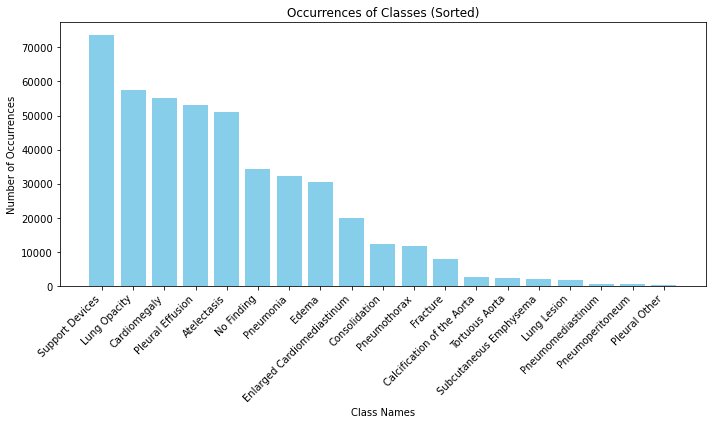

In [48]:
t1_occurrences = [int(x) for x in class_cnt]
t1_class_names = ['Atelectasis', 'Calcification of the Aorta', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
                  'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
                  'Pneumomediastinum', 'Pneumonia', 'Pneumoperitoneum', 'Pneumothorax', 'Subcutaneous Emphysema',
                   'Support Devices', 'Tortuous Aorta']

sorted_data = sorted(zip(t1_class_names, t1_occurrences), key=lambda x: x[1], reverse=True)
sorted_class_names, sorted_occurrences = zip(*sorted_data)

plt.figure(figsize=(10, 6))
plt.bar(sorted_class_names, sorted_occurrences, color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Classes (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

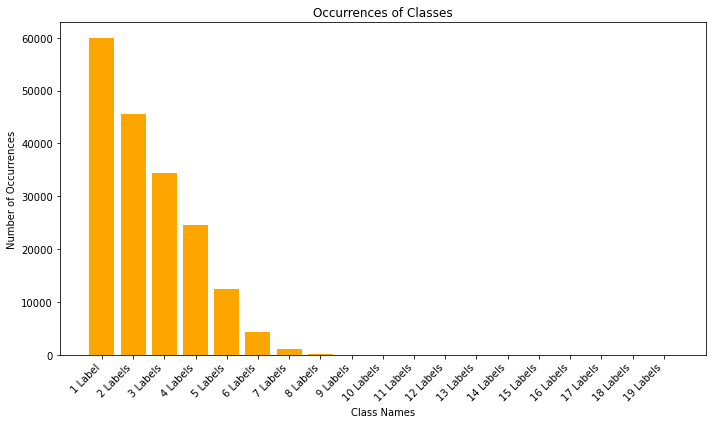

In [49]:
t2_occurrences = label_num_cnt
t2_class_names = ["1 Label", "2 Labels", "3 Labels", "4 Labels", "5 Labels", "6 Labels", "7 Labels", "8 Labels",
               "9 Labels", "10 Labels", "11 Labels", "12 Labels", "13 Labels", "14 Labels", "15 Labels",
               "16 Labels", "17 Labels", "18 Labels", "19 Labels"]


plt.figure(figsize=(10, 6))
plt.bar(t2_class_names, t2_occurrences, color='orange')
plt.xlabel('Class Names')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()